In [ ]:
import os
import json
import spacy
import re
import pandas as pd
from tqdm import tqdm
import numpy as np
from spacy.tokens import DocBin

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/NER-Resume/')

## Processing Data

In [ ]:

# out_path = annotations
root_dir = 'data'
data_out = []
for f in os.listdir('data'):

# if f not in ['rasheeqa.json','akash_hitalni.json']:
    f_path = os.path.join('data',f)
    print(f'Opening file: {f_path}')
    text = []
    entities = []
    with open(f_path,'rb') as f: 
        data = json.load(f)   
    
    for doc in data:
        annots = {}
        try:
            name = doc["documentName"]
            entities = []
            text = doc['document']
            annotation = doc['annotation']
            for an in annotation:
                entities.append((an['start'],an['end'],an['label']))
            annots['text'] = text
            annots['entities'] = entities
            annots['name'] = name
            annots['resume_name'] = name.split('.')[0][:-2] 
        except:
            name = doc["documentName"]
            entities = []
            text = doc['document']
            annotation = doc['tokens']
            for an in annotation:
                entities.append((an['start'],an['end'],an['entityLabel']))
            annots['text'] = text
            annots['entities'] = entities
            annots['name'] = name
            annots['resume_name'] = name.split('.')[0][:-2] 

        print(f'Processed {annots["resume_name"]} --- {annots["name"]}')
        data_out.append(annots)
    print('---'*20)

Opening file: data/annotations_file.json
Processed abhinav_anand --- abhinav_anand_1.txt_2022-08-03_12:01:45.9.txt
Processed abhinav_anand --- abhinav_anand_0.txt_2022-08-03_12:01:45.3.txt
Processed abhinav --- abhinav_1.txt_2022-08-03_12:01:44.8.txt
Processed abhinav --- abhinav_0.txt_2022-08-03_12:01:44.5.txt
Processed abhina_b --- abhina_b_1.txt_2022-08-03_12:01:44.2.txt
Processed abhina_b --- abhina_b_0.txt_2022-08-03_12:01:43.9.txt
Processed abhimanyu_yadav --- abhimanyu_yadav_1.txt_2022-08-03_12:01:43.5.txt
Processed abhimanyu_yadav --- abhimanyu_yadav_0.txt_2022-08-03_12:01:43.2.txt
Processed abhijeet_soni --- abhijeet_soni_1.txt_2022-08-03_12:01:42.9.txt
Processed abhijeet_soni --- abhijeet_soni_0.txt_2022-08-03_12:01:42.6.txt
Processed abdul --- abdul_0.txt_2022-08-03_12:01:42.1.txt
Processed abdal_attar --- abdal_attar_3.txt_2022-08-03_12:01:41.8.txt
Processed abdal_attar --- abdal_attar_2.txt_2022-08-03_12:01:41.5.txt
Processed abdal_attar --- abdal_attar_1.txt_2022-08-03_12

In [ ]:
data_out[100]

{'text': 'Intrusion Detection System Using Auto-encoder | Tech Stack: Python\ne Inthis project when the new request comes it checks if it is normal or not. Training is done with nb-15 Datasets. And implemented\nwith Auto-encoder and Keras.\nComparison Between Restic and Snapmirror | Tech Stack: Python\ne Inthis project, it will find which backup system is best-suited restic or snapmirror by doing some testing and analyzing.\nPDF to Word conversion | Tech Stack: C#, OpenCV\ne Inthis project convert pdf document into word document with OCR. Users will upload the pdf or give a pdf path and then the text is\nshown on board and the User can Save it to a word file.\nOnline Banking System | Tech Stack: C#, Oracle DB\ne Inthis project, User will open their account and after that, they can transfer the money from one account to another. And also able\nto request the withdrawal request and also some banking services.\nCodester Online IDE | Tech Stack: Java, JSP\ne Inthis project, the User will c

In [ ]:
# #rasheeqa

# # out_path = annotations
# root_dir = 'data'
# data_out = []
# for f in os.listdir('data'):

# # if f in ['darshika.json','niswarth.json','rasheeqa.json','anjali.json','bhagya.json','akash_hitalni.json','akshatha_reddy.json']:

#   if f in ['anjali.json','bhagya.json','niswarth.json','darshika.json','akshatha_reddy.json','akshata_patil.json']:
#     f_path = os.path.join('data',f)
#     print(f'Opening file: {f_path}')
#     text = []
#     entities = []
#     with open(f_path,'rb') as f: 
#         data = json.load(f)   
    
#     for doc in data:
#         annots = {}
#         try:
#             name = doc["documentName"]
#             entities = []
#             text = doc['document']
#             annotation = doc['annotation']
#             for an in annotation:
#                 entities.append((an['start'],an['end'],an['label']))
#             annots['text'] = text
#             annots['entities'] = entities
#             annots['name'] = name
#             annots['resume_name'] = name.split('.')[0][:-2] 
#         except:
#             name = doc["documentName"]
#             entities = []
#             text = doc['document']
#             annotation = doc['tokens']
#             for an in annotation:
#                 entities.append((an['start'],an['end'],an['entityLabel']))
#             annots['text'] = text
#             annots['entities'] = entities
#             annots['name'] = name
#             annots['resume_name'] = name.split('.')[0][:-2] 

#         # print(f'Processed {annots["resume_name"]} --- {annots["name"]}')
#         data_out.append(annots)
#     print('---'*20)

In [ ]:
# data_out[10]

**Splitting to train and test**

In [ ]:
df = pd.read_csv('phase3_labels.csv')
# print(df.shape)
# df = df.drop_duplicates(subset=['name'])
print(df.shape)
df.head()

(298, 2)


,name,label
0,aakansha_tyagi,1
1,abashes_das,1
2,abdal_attar,1
3,abdul,1
4,abhijeet_soni,0


In [ ]:
#filtering labels

filtered_names = [] 
idxes = []

for i in range(len(data_out)):
  name = data_out[i]['resume_name']
  if name not in filtered_names:
    df_mini = df[df['name'] == name]
    if df_mini.shape[0] > 0 and name not in filtered_names:
      idx = df_mini.index[0]
      idxes.append(idx)
      filtered_names.append(name)
  
print(len(filtered_names))
df = df.loc[idxes].reset_index(drop=True)
print(df.shape)
df.head()


241
(241, 2)


,name,label
0,abhinav_anand,1
1,abhinav,1
2,abhina_b,0
3,abhimanyu_yadav,1
4,abhijeet_soni,0


In [ ]:

# 70-30 split
df_train = df[:int(0.7*df.shape[0])]
df_test = df[int(0.7*df.shape[0]):].reset_index(drop=True)
print(df_train.shape,df_test.shape)

(168, 2) (73, 2)


In [ ]:
TRAIN_DATA = []
TEST_DATA = []
for d in data_out:
  if d['resume_name'] in df_train['name'].values:
     TRAIN_DATA.append(d)
  else:
     TEST_DATA.append(d)

# ## 80-20 split
print(f'Length of total data: {len(data_out)}' )
print('--'*10)
TRAIN_DATA = data_out[:int(0.8*len(data_out))]
TEST_DATA = data_out[int(0.8*len(data_out)):]

print(f'Length of train data: {len(TRAIN_DATA)}')
print(f'Length of test data: {len(TEST_DATA)}')

Length of total data: 435
--------------------
Length of train data: 348
Length of test data: 87


**Getting whole corpus of words in train data**

In [ ]:
#geting skills from jd

with open('jd.json','rb') as f: 
    jd_data = json.load(f)   

jd_skills = []
for d in jd_data[0]['annotation']:
  skill = re.sub('[^A-Za-z0-9]+', ' ', d['text'].lower())
  skill = skill.strip()
  if skill not in jd_skills:
    jd_skills.append(skill)


print(jd_skills)

['data science', 'natural language processing', 'computer vision', 'regression', 'classification', 'unsupervised learning', 'in r', 'python', 'sql', 'machine learning', 'cloud', 'aws', 'microsoft azure', 'gcp', 'containerization', 'docker', 'kubernetes', 'api development', 'flask', 'plumber', 'django', 'celery', 'code versioning', 'github', 'gitlab', 'codecommit', 'tableau', 'redshift', 'dynamodb', 'statistics', 'mathematics', 'computer science', 'java', 'js', 'c', 'nosql', 'continuous integration', 'continuous deployment', 'ci cd experience', 'big data', 'hadoop', 'spark', 'h2o ai', 'data robot']


In [ ]:
import pickle
pickle.dump(jd_skills, open("jd_skills.pkl", "wb"))

## Loading data

In [ ]:
import re
def trim_entity_spans(data: list) -> list:
    """Removes leading and trailing white spaces from entity spans.

    Args:
        data (list): The data to be cleaned in spaCy JSON format.

    Returns:
        list: The cleaned data.
    """
    invalid_span_tokens = re.compile(r'\s')

    cleaned_data = []
    for p in data:
        text = p['text']
        entities = p['entities']
        resume_name = p['resume_name']
        valid_entities = []
        for start, end, label in entities:

            # removing extra blank spaces
            valid_start = start
            valid_end = end
            while valid_start < len(text) and invalid_span_tokens.match(
                    text[valid_start]):
                valid_start += 1
            while valid_end > 1 and invalid_span_tokens.match(
                    text[valid_end - 1]):
                valid_end -= 1
            valid_entities.append([valid_start, valid_end, label])
        cleaned_data.append({'text':text,'entities': valid_entities,'resume_name':resume_name})

    return cleaned_data

In [ ]:
TRAIN_DATA_PROCESSED = trim_entity_spans(TRAIN_DATA)
TEST_DATA_PROCESSED = trim_entity_spans(TEST_DATA)
TRAIN_DATA_PROCESSED[0]

{'text': "Optimization & Algorithm Development\ne Contributed key role to create a recommendation engine to suggest an ideal technician for faulty site\ne Deployed multiple loss minimization & optimization techniques as part of tuning the model\ne Developed an algorithm for yield management by analyzing the resource optimization trend\ne Monitoring model performance and evaluation metric and changing code where and when required to improve model\ne Modifying and tuning 3+ live models based on the changing nature of data\nSoftware Engineer Mar '16 - Aug '18\nDXC Technology Bangalore\nDXC Technology is an American multinational corporation that provides business-to-business information technology services. More than 100 thousand\nemployees work for DXC Technology\nDatabase Management\nClient - Deutsche Bank\nResponsibilities:\ne Organized and maintain a central application that gather information about the all SQL instance with in the DB server.\ne Ensured expedite SQL query optimization

Lets take only top 500 skills as entities for training

In [ ]:

def get_skills(TRAIN_DATA_PROCESSED,n=100):
   """
   Get the most frequent skills
   """
   train_skills = {}
   for doc in TRAIN_DATA_PROCESSED:
       for d in doc['entities']:
           if d[2] == 'SKILLS':
               skill = doc['text'][d[0]:d[1]]
               skill = re.sub('[^A-Za-z0-9]+', ' ', skill.lower())
               skill = skill.strip()
               if skill not in train_skills.keys():
                   train_skills[skill] = 1
               else:
                   train_skills[skill] += 1
         

   train_skills = dict(sorted(train_skills.items(), key=lambda item: item[1], reverse=True))

   skill_df = pd.DataFrame(train_skills.items(),columns=['skill','frequency'])

   # taking tp 500 skills
   skill_df = skill_df.head(n)
   return skill_df
    



top_skills = get_skills(TRAIN_DATA_PROCESSED,n=500)
top_skills = list(top_skills['skill'])
print(top_skills)

['python', 'machine learning', 'deep learning', 'sql', 'nlp', 'data science', 'pandas', 'numpy', 'tensorflow', 'matplotlib', 'keras', 'logistic regression', 'flask', 'scikit learn', 'tableau', 'seaborn', 'c', 'data analysis', 'random forest', 'aws', 'natural language processing', 'ml', 'mysql', 'classification', 'cnn', 'data visualization', 'computer vision', 'data scientist', 'nltk', 'regression', 'opencv', 'html', 'feature engineering', 'lstm', 'knn', 'r', 'eda', 'linear regression', 'data mining', 'power bi', 'exploratory data analysis', 'svm', 'mongodb', 'git', 'data cleaning', 'statistics', 'pytorch', 'java', 'azure', 'rnn', 'clustering', 'decision tree', 'naive bayes', 'django', 'excel', 'pyspark', 'pycharm', 'xgboost', 'docker', 'css', 'jupyter notebook', 'jira', 'al', 'data preprocessing', 'hadoop', 'data analytics', 'sklearn', 'scipy', 'decision trees', 'neural networks', 'artificial intelligence', 'time series', 'cloud', 'big data', 'spacy', 'object detection', 'k means', 'an

In [ ]:
#nlp = spacy.blank("en") # load a new spacy model

import re
nlp = spacy.load("en_core_web_sm") # load other spacy model
db = DocBin() # create a DocBin object

resumes = []

for d in tqdm(TRAIN_DATA_PROCESSED): # data in previous format

        text = d['text']

        doc = nlp.make_doc(text) # create doc object from text

        ents = []
        for start, end, label in d['entities']: # add character indexes
          
            extracted_entity = text[start:end].lower()

            span = doc.char_span(start, end, label=label, alignment_mode="contract")
            if span is None:
                print("Skipping entity")
                resumes.append(d['resume_name'])
                
            elif extracted_entity in top_skills:
                ents.append(span)

        doc.ents = ents # label the text with the ents
        db.add(doc)
    


    
#saving
db.to_disk("./train.spacy")

100%|██████████| 348/348 [00:02<00:00, 149.23it/s]


### Filling the config file

In [ ]:
!python -m spacy init fill-config base_config.cfg config.cfg

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-05 10:34:37.747496: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


### Run the Training configuration

In [ ]:
!python -m spacy train config.cfg --output ./output --paths.train ./train.spacy --paths.dev ./train.spacy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-01-05 10:34:51.270766: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
ℹ Saving to output directory: output
ℹ Using CPU

=========================== Initializing pipeline ===========================
[2023-01-05 10:34:52,282] [INFO] Set up nlp object from config
INFO:spacy:Set up nlp object from config
[2023-01-05 10:34:52,296] [INFO] Pipeline: ['tok2vec', 'ner']
INFO:spacy:Pipeline: ['tok2vec', 'ner']
[2023-01-05 10:34:52,300] [INFO] Created vocabulary
INFO:spacy:Created vocabulary
[2023-01-05 10:34:52,301] [INFO] Finished initializing nlp object
INFO:spacy:Finished initializing nlp object
[2023-01-05 10:34:57,894] [INFO] Initialized pipeline components: ['tok2vec', 'ner']
INFO:spacy:Initialized pipeline components: ['tok2vec', 'ner']
✔ Initialized pipelin

## Inference

In [ ]:
nlp1 = spacy.load(r"output/model-best") #load the best model

text = "Experienced in collecting, analyzing, and interpreting\nlarge datasets, developing software solutions, and performing data management tasks. Possessing extensive analytical skills, strong\nattention to detail and a significant ability to work in team environment.\nTECHNICAL SKILLS 00.2... ccc cece cece eee e eee e eee eens eee eee e eee nena eee eee e eee eee eeeee eee eee eee eeeee esas\ne Packages: Scikit - Learn, Numpy, SciPy, Plot.py, Pandas, NLTK, Matplotlib, Flask, Seaborn\ne Big Data Stack: Python, PostgreSQL, MongoDB, Linux, Hadoop\ne Statistics/ML/NLP: Linear/Logistic Regression, K-Nearest Neighbors, Random Forest, Naive Bayes, Clustering, BERT, GloVE, CNN,\nRNN, MobileNetV2\ne Visualization: Tableau, QlikSense\nPROJECTS"
doc = nlp1(text) # input sample text

spacy.displacy.render(doc, style="ent", jupyter=True) # display in Jupyter

### Perfomance on Test data

In [ ]:
def calc_precision(pred, true):        
    precision = len([x for x in pred if x in true]) / (len(pred) + 1e-20) # true positives / total pred
    return precision

def calc_recall(pred, true):
    recall = len([x for x in true if x in pred]) / (len(true) + 1e-20)    # true positives / total test
    return recall

def calc_f1(precision, recall):
    f1 = 2 * ((precision * recall) / (precision + recall + 1e-20))
    return f1

In [ ]:
model = spacy.load(r"output/model-best") #load the best model
precisions, recalls, f1s = [], [], []

for data in TEST_DATA:
    doc = data["text"]
    inp_entities = data['entities']

    out = model(doc)
    true_labels = [i[2] for i in inp_entities]
    pred_labels = [i.label_ for i in out.ents]
    # print(out.ents,out.cats)
    precision = calc_precision(true_labels, pred_labels)
    precisions.append(precision)
    recall = calc_recall(true_labels, pred_labels)
    recalls.append(recall)
    f1s.append(calc_f1(precision, recall))
  
print(f'precision: {np.mean(precisions)}')
print(f'Recalls:  {np.mean(recalls)}')
print(f'F1 score:  {np.mean(f1s)}')

precision: 0.8747608191574734
Recalls:  0.9648786717752235
F1 score:  0.9070164653588905


In [ ]:
# for i,data in enumerate(TEST_DATA):
#     doc = data["text"]
#     out = model(doc)
#     spacy.displacy.render(out, style="ent", jupyter=True) # display in Jupyter
#     print('--'*20)
#     if i == 5:
#         break

# Resume screeneer

In [ ]:



def generate_one_hot_vec(inp_list,train_skills):
   one_hot_dict = {i:0 for i in train_skills}

   for i in inp_list:
     if i in one_hot_dict.keys():
        one_hot_dict[i] = 1
   return list(one_hot_dict.values()),list(one_hot_dict.keys())

def similarity_jd(inp_skills):
    """
    percentage of skills match with job description
    """
    count = 0 
    for i in inp_skills:
      if i in jd_skills:
        count +=1
  
    return count/len(jd_skills)


def get_skills(TRAIN_DATA_PROCESSED,n=100):
   train_skills = {}
   for doc in TRAIN_DATA_PROCESSED:
       for d in doc['entities']:
           if d[2] == 'SKILLS':
               skill = doc['text'][d[0]:d[1]]
               skill = re.sub('[^A-Za-z0-9]+', ' ', skill.lower())
               skill = skill.strip()
               if skill not in train_skills.keys():
                   train_skills[skill] = 1
               else:
                   train_skills[skill] += 1
         

   train_skills = dict(sorted(train_skills.items(), key=lambda item: item[1], reverse=True))

   skill_df = pd.DataFrame(train_skills.items(),columns=['skill','frequency'])

   # taking tp 500 skills
   skill_df = skill_df.head(n)
   return skill_df
    

In [ ]:
import re

skill_df = get_skills(TRAIN_DATA_PROCESSED,n=300)
skill_df.head()



,skill,frequency
0,python,537
1,machine learning,454
2,deep learning,200
3,sql,178
4,nlp,157


In [ ]:
# print(skill_df['skill'].values.tolist())
import pickle

pickle.dump(train_skills, open("top_300_skills.pkl", "wb"))

In [ ]:
model = spacy.load(r"output/model-best") #load the best model
train_skills = skill_df['skill'].values.tolist()

train_data = []
for idx, d in df_train.iterrows():
    name,label = d[0],d[1]
    
    # geting text data from doc
    text = ' '.join([d['text'] for d in TRAIN_DATA if d['resume_name'] == name])
    out = model(text)
    predicted_skills = list(out.ents)
  
    skills = [p.text.lower() for p in predicted_skills]
    out_vec,col_names = generate_one_hot_vec(skills,train_skills)

    sim = similarity_jd(skills)
    d = [name,sim] + out_vec + [label]
    train_data.append(d)
    

dff_train = pd.DataFrame(train_data,columns=['name','similarity'] + col_names + ['label'])



test_data = []
for idx, d in df_test.iterrows():
    name,label = d[0],d[1]
    
    # geting text data from doc
    text = ' '.join([d['text'] for d in TEST_DATA if d['resume_name'] == name])
    out = model(text)
    predicted_skills = list(out.ents)
  
    skills = [p.text.lower() for p in predicted_skills]
    out_vec,col_names = generate_one_hot_vec(skills,train_skills)
    sim = similarity_jd(skills)
    d = [name,sim] + out_vec + [label]
    test_data.append(d)
    

dff_test = pd.DataFrame(test_data,columns=['name','similarity'] + col_names + ['label'])

# print(dff_train.shape,dff_test.shape)

In [ ]:
print(top_skills)

['python', 'machine learning', 'deep learning', 'sql', 'nlp', 'data science', 'pandas', 'numpy', 'tensorflow', 'matplotlib', 'keras', 'logistic regression', 'flask', 'scikit learn', 'tableau', 'seaborn', 'c', 'data analysis', 'random forest', 'aws', 'natural language processing', 'ml', 'mysql', 'classification', 'cnn', 'data visualization', 'computer vision', 'data scientist', 'nltk', 'regression', 'opencv', 'html', 'feature engineering', 'lstm', 'knn', 'r', 'eda', 'linear regression', 'data mining', 'power bi', 'exploratory data analysis', 'svm', 'mongodb', 'git', 'data cleaning', 'statistics', 'pytorch', 'java', 'azure', 'rnn', 'clustering', 'decision tree', 'naive bayes', 'django', 'excel', 'pyspark', 'pycharm', 'xgboost', 'docker', 'css', 'jupyter notebook', 'jira', 'al', 'data preprocessing', 'hadoop', 'data analytics', 'sklearn', 'scipy', 'decision trees', 'neural networks', 'artificial intelligence', 'time series', 'cloud', 'big data', 'spacy', 'object detection', 'k means', 'an

In [ ]:
['python', 'machine learning', 'deep learning', 'sql', 'nlp', 'data science', 'pandas', 'numpy', 'tensorflow', 'matplotlib', 'keras', 'logistic regression', 'flask', 'scikit learn', 'tableau', 'seaborn', 'c', 'data analysis', 'random forest', 'aws', 'natural language processing', 'ml', 'mysql', 'classification', 'cnn', 'data visualization', 'computer vision', 'data scientist', 'nltk', 'regression', 'opencv', 'html', 'feature engineering', 'lstm', 'knn', 'r', 'eda', 'linear regression', 'data mining', 'power bi', 'exploratory data analysis', 'svm', 'mongodb', 'git', 'data cleaning', 'statistics', 'pytorch', 'java', 'azure', 'rnn', 'clustering', 'decision tree', 'naive bayes', 'django', 'excel', 'pyspark', 'pycharm', 'xgboost', 'docker', 'css', 'jupyter notebook', 'jira', 'al', 'data preprocessing', 'hadoop', 'data analytics', 'sklearn', 'scipy', 'decision trees', 'neural networks', 'artificial intelligence', 'time series', 'cloud', 'big data', 'spacy', 'object detection', 'k means', 'ann', 'gcp', 'selenium', 'image processing', 'etl', 'github', 'k means clustering', 'modelling', 'pca', 'transfer learning', 'javascript', 'postgresql', 'oracle', 'linux', 'scikit', 'predictive modelling', 'statistical analysis', 'word2vec', 'bert', 'bitbucket', 'sentiment analysis', 'heroku', 'visualization', 'machine learning algorithms', 'spark', 'matlab', 'ai', 'jenkins', 'chatbot', 'hive', 'api', 'data pre processing', 'arima', 'deployment', 'python3', 'jupyter', 'google colab', 'support vector machine', 'feature selection', 'data processing', 'json', 'hypothesis testing', 'web scraping', 'image classification', 'data preparation', 'statistical modeling', 'developing', 'tf idf', 'statistical modelling', 'neural network', 'xml', 'probability', 'data modeling', 'yolo', 'data analyst', 'anaconda', 'spyder', 'agile', 'databricks', 'data manipulation', 'rasa', 'lda', 'jquery', 'sql server', 'predictive analysis', 'core java', 'hdfs', 'transformers', 'linear logistic regression', 'windows', 'gru', 'hyper parameter tuning', 'aws sagemaker', 'ocr', 'visual studio', 'naive bayes classifier', 'data validation', 'kafka', 'modeling', 'predictive modeling', 'business intelligence', 'lemmatization', 'asp net', 'mvc', 'recommendation system', 'model deployment', 'ms excel', 'microsoft azure', 'data structure', 'coding', 'time series analysis', 'random forests', 'bootstrap', 'iot', 'rest apis', 'ner', 'data cleansing', 'elastic search', 'eclipse', 'streamlit', 'database', 'regex', 'k nn', 'athena', 'php', 'anova', 'big data analytics', 'data wrangling', 'boosting', 'logistic', 'testing', 'xg boost', 'bag of words', 'web scrapping', 'regression analysis', 'ada boost', 'sqlite', 'programming', 'dl', 'lasso', 'ridge', 'machine learning algorithm', 'web development', 'kubernetes', 'nodejs', 'model building', 'supervised learning', 'pl sql', 'descriptive statistics', 'sarima', 'fastapi', 'predictive analytics', 'text mining', 'development', 't test', 'cross validation', 'ms office', 'k nearest neighbors', 'vs code', 'cv', 'ml algorithms', 'reinforcement learning', 'dax', 'gensim', 'adaboost', 'svn', 'data extraction', 'gradient boosting', 'powerbl', 'rest api', 'mlflow', 'statistical', 'scikitlearn', 'clustering algorithms', 'hbase', 'data visualisation', 'bagging', 'sci py', 'hyperparameter tuning', 'java script', 'open cv', 'inferential statistics', 'ensemble techniques', 'cobol', 'object oriented programming', 'angular js', 'deploying', 'internet of things', 'simulink', 'nbo', 'stemming', 'mongo db', 'support vector machines', 'convolutional neural network', 'restful api', 'tensor flow', 'svr', 'svc', 'ar', 'ma', 'arma', 'databases', 'cloud computing', 'deep learning algorithms', 'nlu', 'unet', 'bigdata', 'restapi', 'kibana', 'k nearest neighbor', 'superputty', 'sharepoint', 'sqoop', 'nltk library', 'hibernate', 'random forest regression', 'semantic segmentation', 'gan', 'image segmentation', 'apache spark', 'plotly', 'data modelling', 'google cloud', 'feature extraction', 'ec2', 'amazon web services', 'ensemble', 'train test split', 'application development', 'vba', 'dbscan', 'rstudio', 'labellmg', 'gradient descent', 'db2', 'cl cd', 'data engineering', 'deep neural networks', 'neo4j', 'exploratory data analysis eda', 'apis', 'pil', 'model development']

In [ ]:
X_train = dff_train.drop(columns=['name','label'])
y_train = dff_train['label'] 

X_test = dff_test.drop(columns=(['name','label']))
y_test = dff_test['label']

print(X_train.shape,X_test.shape)


(168, 301) (73, 301)


## Logistic Regression

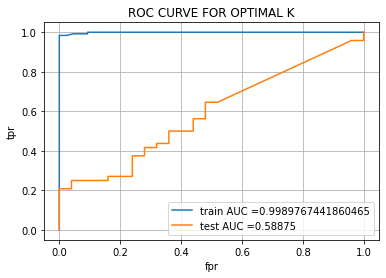

Area under train roc 0.9989767441860465
Area under test roc 0.58875


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# model = RandomForestClassifier()
lr_model = LogisticRegression()

lr_model.fit(X_train,y_train) 

train_fpr, train_tpr, thresholds = roc_curve(y_train, lr_model.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])

plt.grid(True)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC CURVE FOR OPTIMAL K")
plt.show()

#Area under ROC curve
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))



##Random Forest

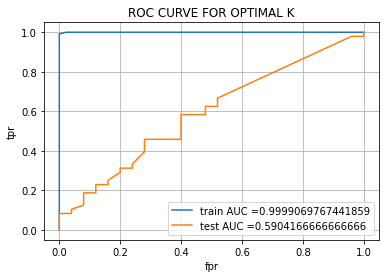

Area under train roc 0.9999069767441859
Area under test roc 0.5904166666666666


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

model = RandomForestClassifier()
# lr_model = LogisticRegression()

model.fit(X_train,y_train) 

train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

plt.grid(True)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC CURVE FOR OPTIMAL K")
plt.show()

#Area under ROC curve
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))



### Xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

clf = XGBClassifier(n_jobs= -1,class_weight='balanced')
no_of_estimators = [5, 10, 50, 100, 120]
maximumdepth = [1, 5, 7, 10, 15, 25, 30]

parameters = {'n_estimators': no_of_estimators ,'max_depth':maximumdepth}
model = RandomizedSearchCV(estimator=clf, param_distributions=parameters, cv=3, n_jobs=-1, scoring='roc_auc',return_train_score=True)

model.fit(X_train,y_train)
print("Model with best parameters :\n",model.best_params_)


Model with best parameters :
 {'n_estimators': 50, 'max_depth': 5}


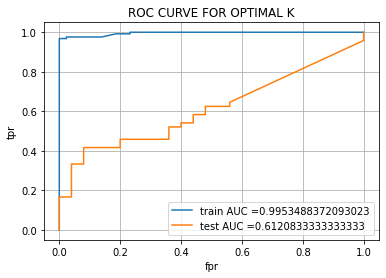

Area under train roc 0.9953488372093023
Area under test roc 0.6120833333333333


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

model_xb = XGBClassifier(**model.best_params_,class_weight='balanced')
model_xb.fit(X_train,y_train) 

train_fpr, train_tpr, thresholds = roc_curve(y_train, model_xb.predict_proba(X_train)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model_xb.predict_proba(X_test)[:,1])

plt.grid(True)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC CURVE FOR OPTIMAL K")
plt.show()

#Area under ROC curve
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))


In [ ]:
#saving model
# model_xb.save_model("xgboost_model.json")
import pickle
pickle.dump(model_xb, open("xgb_model.pkl", "wb"))

## Checkig target distribution

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


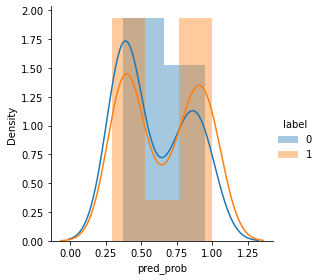

In [ ]:
import seaborn as sns
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
df_test['pred_prob'] = y_pred_prob
sns.FacetGrid(df_test,hue='label',size=4).map(sns.distplot,'pred_prob').add_legend()
plt.show()

<ipython-input-33-a2cf077f8961>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['pred_prob'] = y_pred_prob
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a 

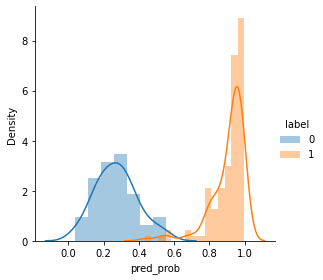

In [ ]:
y_pred_prob = lr_model.predict_proba(X_train)[:,1]
df_train['pred_prob'] = y_pred_prob
sns.FacetGrid(df_train,hue='label',size=4).map(sns.distplot,'pred_prob').add_legend()
plt.show()

# SIMULATION

In [ ]:
df_test.shape

(73, 3)

In [ ]:
from scipy.special import modfresnelp





def predict_label(text):
   out = NER_MODEL(text)
   predicted_skills = list(out.ents)
  
   skills = [p.text.lower() for p in predicted_skills]
   out_vec = generate_one_hot_vec(skills)
   sim = similarity_jd(skills)
   d = [sim] + out_vec
   sample_x = pd.DataFrame([d],columns=['similarity'] + [f'vec_{i}' for i in range(0,len(train_skills))])
   sample_y_pred = lr_model.predict(sample_x)
   return sample_y_pred[0]


def get_prediction(sample_df_test,train_skills):
    test_data = []

    for idx, d in sample_df_test.iterrows():
        name,label = d[0],d[1]

        # geting text data from doc
        text = ' '.join([d['text'] for d in TEST_DATA if d['resume_name'] == name])
        out = NER_MODEL(text)
        predicted_skills = list(out.ents)

        skills = [p.text.lower() for p in predicted_skills]
        out_vec = generate_one_hot_vec(skills,train_skills)
        sim = similarity_jd(skills)
        d = [name,sim] + out_vec + [label]
        test_data.append(d)
    dff_test = pd.DataFrame(test_data,columns=['name','similarity'] + [f'vec_{i}' for i in range(0,len(train_skills))] + ['label'])

    sample_x = dff_test.drop(columns=['name','label'])
    sample_pred = MODEL.predict(sample_x)

    #probability to be selected
    sample_pred_prob = MODEL.predict_proba(sample_x)[:,1]

    dff_test['pred_label'] = sample_pred


    dff_test['pred_prob'] = sample_pred_prob

    return dff_test


def get_iterations_required(dff_test):
    # print(dff_test['label'])

    first_pred_index = dff_test[dff_test['label'] == 1].index[0]  #actual label
    sorted_df = dff_test.sort_values(by='pred_prob',ascending=False).reset_index()  # descending
    # print('**'*20)
    # print(sorted_df[['pred_prob','label']])
    first_pred_index_worst_case = sorted_df[sorted_df['label'] == 1].index[0]  #actual label
    print(first_pred_index+1,first_pred_index_worst_case+1)
    return (first_pred_index+1,first_pred_index_worst_case+1)

In [ ]:

#spacy model
NER_MODEL = spacy.load(r"output/model-best") #load the best model
train_skills = skill_df['skill'].values.tolist()
MODEL = model_xb

out = []
k = 50
for i in range(k):
    sample_df_test = df_test.sample(frac=0.8).reset_index(drop=True)
    dff_test = get_prediction(sample_df_test,train_skills)
    out.append(get_iterations_required(dff_test))
  

1 1
1 1
1 1
3 1
1 1
1 1
1 1
2 1
1 1
1 1
1 1
2 1
1 1
1 1
2 1
1 1
2 1
2 1
1 1
2 1
1 1
1 1
1 1
1 1
4 1
1 1
1 1
1 1
3 1
3 1
1 1
1 1
1 1
1 1
2 1
1 1
2 1
1 1
1 1
2 1
1 1
1 1
2 1
2 1
1 1
1 1
3 1
2 1
1 1
1 1


In [ ]:
df_count = pd.DataFrame(out,columns=['label_count','prob_count'])
df_count.to_csv('count.csv',index=False)

In [ ]:
df_count['label_count'].mean(),df_count['prob_count'].mean()

(1.46, 1.0)

In [ ]:
stats = [(1, 17), (2, 41), (1, 23), (3, 12), (2, 58), (1, 40), (1, 1), (5, 25), (2, 23), (2, 26), (2, 24), (2, 4), (1, 27), (1, 15), (2, 28), (2, 30), (4, 4), (1, 57), (1, 2), (2, 22), (2, 40), (2, 35), (1, 14), (1, 58), (3, 7), (1, 21), (1, 32), (2, 37), (4, 4), (5, 11), (1, 48), (1, 57), (1, 42), (1, 55), (1, 33), (1, 22), (2, 44), (1, 32), (1, 37), (1, 19), (1, 43), (1, 22), (2, 54), (1, 9), (1, 9), (1, 32), (3, 53), (2, 51), (1, 35), (1, 4)]


print(stats)

[(1, 17), (2, 41), (1, 23), (3, 12), (2, 58), (1, 40), (1, 1), (5, 25), (2, 23), (2, 26), (2, 24), (2, 4), (1, 27), (1, 15), (2, 28), (2, 30), (4, 4), (1, 57), (1, 2), (2, 22), (2, 40), (2, 35), (1, 14), (1, 58), (3, 7), (1, 21), (1, 32), (2, 37), (4, 4), (5, 11), (1, 48), (1, 57), (1, 42), (1, 55), (1, 33), (1, 22), (2, 44), (1, 32), (1, 37), (1, 19), (1, 43), (1, 22), (2, 54), (1, 9), (1, 9), (1, 32), (3, 53), (2, 51), (1, 35), (1, 4)]


In [ ]:
df_count['label_count'].median(),df_count['prob_count'].median()

(1.0, 1.0)